K=1 → Accuracy: 0.9667
K=2 → Accuracy: 1.0000
K=3 → Accuracy: 1.0000
K=4 → Accuracy: 1.0000
K=5 → Accuracy: 1.0000
K=6 → Accuracy: 1.0000
K=7 → Accuracy: 1.0000
K=8 → Accuracy: 1.0000
K=9 → Accuracy: 1.0000
K=10 → Accuracy: 1.0000


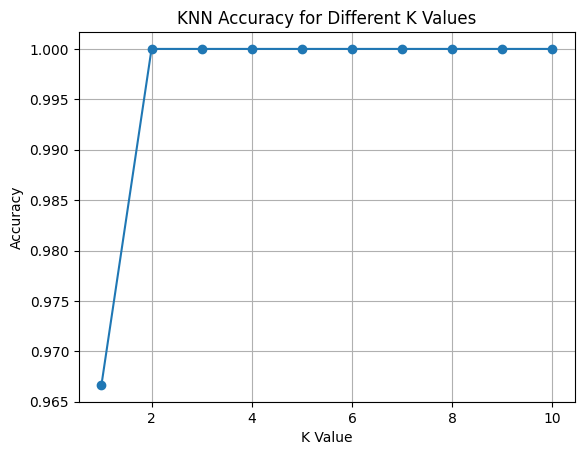


✅ Final KNN Model Evaluation
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1]:
# Task 3: K-Nearest Neighbors (KNN) – Iris Dataset

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Try different K values and record accuracy
k_values = range(1, 11)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} → Accuracy: {acc:.4f}")

# Plot accuracy vs. K
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Final model with best K
best_k = k_values[accuracies.index(max(accuracies))]
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_test)

# Evaluation
print("\n✅ Final KNN Model Evaluation")
print("Confusion Matrix:\n", confusion_matrix(y_test, final_preds))
print("\nClassification Report:\n", classification_report(y_test, final_preds))